## https://www.linkedin.com/in/kajen-thavaraj/
## Using dataset from: https://www.kaggle.com/datasets/kyr7plus/emg-4?resource=download

### Process data from emg_data folder

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import os

# Open csv files in folder
for file in os.listdir('emg_data'):
    df = pd.read_csv('emg_data/' + file)
    print(df.head())

   26.0  4.0  5.0   8.0  -1.0  -13.0  -109.0  -66.0  -9.0  2.0  ...  -28.0  \
0 -47.0 -6.0 -5.0  -7.0  13.0   -1.0    35.0  -10.0  10.0 -4.0  ...  -25.0   
1 -19.0 -8.0 -8.0  -8.0 -21.0   -6.0   -79.0   12.0   0.0  5.0  ...  -83.0   
2   2.0  3.0  0.0   2.0   0.0   22.0   106.0  -14.0 -16.0 -2.0  ...  -38.0   
3   6.0  0.0  0.0  -2.0 -14.0   10.0   -51.0    5.0   7.0  0.0  ...   38.0   
4  15.0 -5.0 -5.0 -15.0  12.0  -22.0   -38.0   36.0   9.0  6.0  ...  -26.0   

   61.0  4.0.3  8.0.1  5.0.1  4.0.4  -7.0.1  -59.0  16.0  0  
0  47.0    6.0    6.0    5.0   13.0    21.0  111.0  15.0  0  
1   7.0    7.0    1.0   -8.0    7.0    21.0  114.0  48.0  0  
2 -11.0    4.0    7.0   11.0   33.0    39.0  119.0  43.0  0  
3 -35.0   -8.0    2.0    6.0  -13.0   -24.0 -112.0 -69.0  0  
4   5.0    6.0    6.0   11.0    5.0    30.0  -48.0  25.0  0  

[5 rows x 65 columns]
   -7.0  -1.0  -1.0.1  0.0  -10.0  -10.0.1  -1.0.2  1.0  -5.0  -5.0.1  ...  \
0  -6.0  -2.0    -5.0 -2.0   27.0     42.0     3.0  5.0  1

In [6]:
## Load data

dataframes = []


dataframes.append(pd.read_csv(f'emg_data/0.csv'))
dataframes.append(pd.read_csv(f'emg_data/1.csv'))
dataframes.append(pd.read_csv(f'emg_data/2.csv'))
dataframes.append(pd.read_csv(f'emg_data/3.csv'))


for df in dataframes:
    df.columns = list(range(len(df.columns)))


# print()

# Combine all dataframes into one
combined_df = pd.concat(dataframes, ignore_index=True)

combined_df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
1,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
2,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
3,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0
4,15.0,-5.0,-5.0,-15.0,12.0,-22.0,-38.0,36.0,9.0,6.0,...,-26.0,5.0,6.0,6.0,11.0,5.0,30.0,-48.0,25.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11669,-3.0,-1.0,-1.0,-1.0,-28.0,20.0,5.0,0.0,-5.0,0.0,...,-3.0,1.0,4.0,3.0,4.0,-51.0,-49.0,5.0,-9.0,3
11670,-13.0,-5.0,-4.0,-3.0,-4.0,-24.0,-10.0,-8.0,20.0,9.0,...,6.0,-3.0,-3.0,-3.0,-5.0,-4.0,-45.0,-12.0,-15.0,3
11671,-1.0,-3.0,-1.0,1.0,30.0,38.0,-1.0,36.0,-10.0,1.0,...,14.0,-8.0,-4.0,-4.0,-4.0,-21.0,-29.0,-5.0,0.0,3
11672,1.0,4.0,4.0,5.0,9.0,-10.0,4.0,1.0,-2.0,-1.0,...,-16.0,-3.0,0.0,-3.0,-5.0,-36.0,-90.0,3.0,5.0,3


In [7]:
# Get the finge position from the data
finger_position = combined_df[64].copy()

# Get the emg values from 0 to 63
emg_values = combined_df.iloc[:, 0:64]

# Standardize the emg values
scaler = StandardScaler()
emg_values = scaler.fit_transform(emg_values)

# Print the shape of the emg values
print(emg_values.shape)

# Print the shape of the finger position
print(finger_position.shape)

(11674, 64)
(11674,)


In [8]:
import numpy as np

# Create indices
indices = np.arange(len(emg_values))
np.random.seed(100)
np.random.shuffle(indices)

# Calculate split point
split_idx = int(0.7 * len(emg_values))

# Split indices
train_indices = indices[:split_idx]
test_indices = indices[split_idx:]

# Create splits
X_train = emg_values[train_indices]
X_test = emg_values[test_indices]
y_train = finger_position[train_indices]
y_test = finger_position[test_indices]

## Train model

In [15]:
y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes=4)
y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes=4)

inputs = tf.keras.Input(shape=(emg_values.shape[1],))
x = tf.keras.layers.Dense(1024, activation='relu')(inputs)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)


model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

batch_size = 32
epochs = 50

history = model.fit(
    X_train,
    y_train_onehot,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau()
    ]
)

Epoch 1/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2888 - loss: 1.3588 - val_accuracy: 0.4251 - val_loss: 1.2465 - learning_rate: 0.0100
Epoch 2/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4885 - loss: 1.2198 - val_accuracy: 0.6654 - val_loss: 1.1204 - learning_rate: 0.0100
Epoch 3/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6563 - loss: 1.0929 - val_accuracy: 0.7339 - val_loss: 0.9991 - learning_rate: 0.0100
Epoch 4/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7367 - loss: 0.9605 - val_accuracy: 0.7896 - val_loss: 0.8790 - learning_rate: 0.0100
Epoch 5/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7791 - loss: 0.8486 - val_accuracy: 0.8122 - val_loss: 0.7693 - learning_rate: 0.0100
Epoch 6/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8185 - loss: 0.7400 - val_accuracy: 0.8361 - val_loss: 0.6698 - learning_rate: 0.0100
Epoch 7/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8345 - loss: 0.6367 - 

## Visualize Data

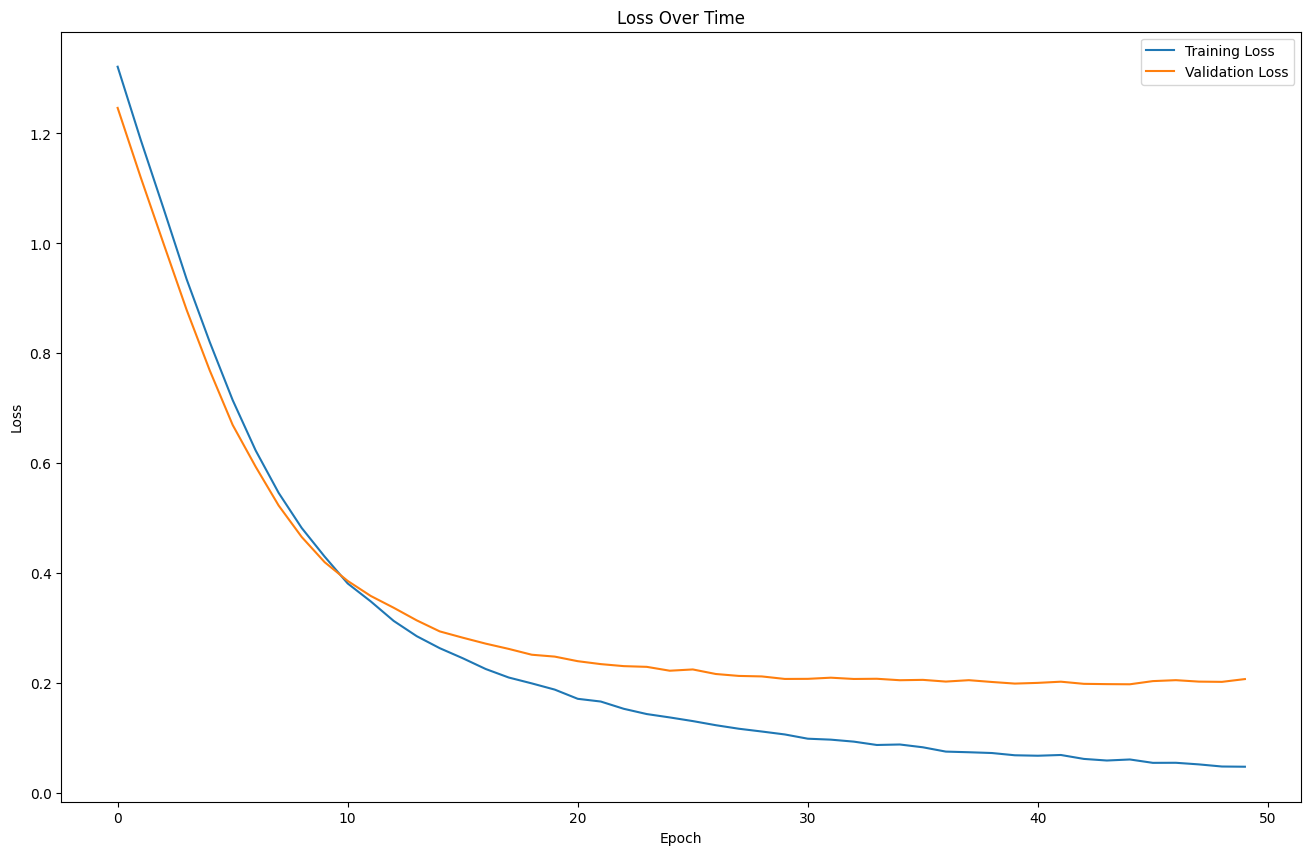

In [16]:
plt.figure(figsize=(16, 10))

plt.plot(range(epochs), history.history['loss'], label="Training Loss")
plt.plot(range(epochs), history.history['val_loss'], label="Validation Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Over Time")

plt.show()

In [19]:
model.evaluate(X_test, y_test_onehot)

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9389 - loss: 0.2099


[0.2158598154783249, 0.9369112253189087]

In [24]:
predictions = model.predict(X_test)

y_true = np.argmax(y_test_onehot, axis=1)  # Convert one-hot to class indices
y_pred = np.argmax(predictions, axis=1)     # Convert predictions to class indices

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


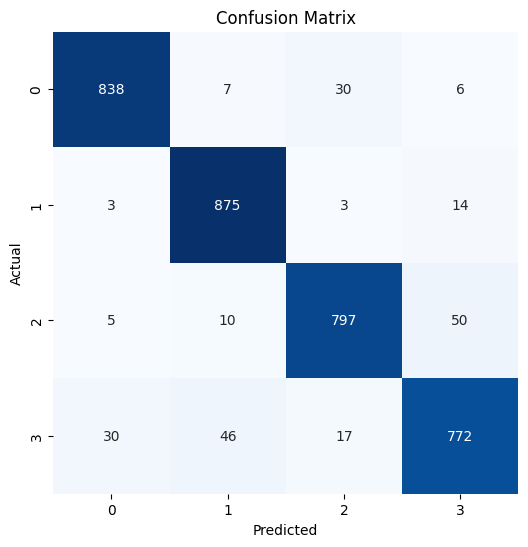

In [25]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [14]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       881
           1       0.96      0.97      0.96       895
           2       0.94      0.92      0.93       862
           3       0.91      0.92      0.91       865

    accuracy                           0.94      3503
   macro avg       0.94      0.94      0.94      3503
weighted avg       0.94      0.94      0.94      3503

